# Histogram Analysis of the 4LAC Catalog

In this file, we want to analyze the the relations between the flux and the spectrum flux by using histograms.


For each source of the catalog, we may divide each flux point of each lightcurve with respect to its flux obatined from the Spectrum (by integrating the Spectrum from 0.1-100 GeV, for more info, see the \_\_init\_\_.ipynb file on how the Spectrum flux was calculated).


By dividing the flux points of a source by its average spectrum flux, we obtain what we are calling the **brightening factor**, to find out if there is a specific flux proportion that is more common!


Since the Average Flux is usually too far from the Spectrum Flux, we are selecting only a percentage of this difference for each source type.

In [1]:
## CHANGE PATH IN: __init__.ipynb

%run __init__.ipynb

When you run __init__.ipynb, you upload the imports, as well as the paths, functions and dataframes necessary for the analysis.

################### IMPORTANT PATHS ###################

--> PATH : for the main folder CTA_BrighteningAnalysis downloaded from Github

For the downloaded lightcurves from the catalog folder, use:
-> PATH_3DAY_LC : 3-day bin lightcurves
-> PATH_WEEKLY_LC : weekly bin lightcurves

##################### DATAFRAMES ######################

# of sources in the dataframes:
dfLSP: 1538
dfISP: 508
dfHSP: 548
---> total: 2594

dat: 3511

############### LIGHTCURVES FROM FOLDER ###############

--------------- 3-day bin ---------------

# of lightcurves from the folder in the array:
lc_downloaded_LSP_3days: 465
lc_downloaded_ISP_3days: 60
lc_downloaded_HSP_3days: 66
---> total: 591

lc_downloaded_3days: 683

--------------- Weekly bin ---------------

# of lightcurves from the folder in the array:
lc_downloaded_LSP_weekly: 465
lc_downloaded_ISP_weekly: 60
lc_downloaded

## 3-day bin

### High Synchrotron Peak

#### 10%

Source J0030.2-1647 percentage: 95.0
Source J0033.5-1921 percentage: 48.0
Source J0051.2-6242 percentage: 89.0
Source J0143.7-5846 percentage: 74.0
Source J0156.8-4744 percentage: 91.0
Source J0156.9-5301 percentage: 88.0
Source J0209.3-5228 percentage: 63.0
Source J0216.8-6635 percentage: 82.0
Source J0226.5-4441 percentage: 91.0
Source J0237.6-3602 percentage: 93.0
Source J0238.1-3905 percentage: 90.0
Source J0238.4-3116 percentage: 79.0
Source J0244.6-5819 percentage: 86.0
Source J0303.4-2407 percentage: 27.0
Source J0305.1-1608 percentage: 94.0
Source J0310.6-5017 percentage: 91.0
Source J0325.5-5635 percentage: 87.0
Source J0325.6-1646 percentage: 77.0
Source J0331.3-6156 percentage: 97.0
Source J0335.1-4459 percentage: 88.0
Source J0449.4-4350 percentage: 9.0
 >>> Source J0449.4-4350 selected!
Source J0509.9-6417 percentage: 91.0


/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0538.2-3910 percentage: 96.0
Source J0543.9-5531 percentage: 72.0
Source J0622.3-2605 percentage: 57.0
Source J0626.4-4259 percentage: 93.0
Source J0630.9-2406 percentage: 33.0
Source J0746.6-4754 percentage: 79.0
Source J0803.2-0337 percentage: 78.0
Source J0816.4-1311 percentage: 67.0
Source J0841.3-3554 percentage: 76.0
Source J0953.0-0840 percentage: 54.0
Source J1010.2-3119 percentage: 87.0
Source J1023.8-4335 percentage: 79.0
Source J1026.9-1749 percentage: 86.0
Source J1141.5-1408 percentage: 95.0
Source J1304.3-4353 percentage: 99.0
Source J1307.6-4259 percentage: 93.0
Source J1310.7-5553 percentage: 99.0
Source J1312.4-2156 percentage: 100.0
Source J1315.9-0732 percentage: 93.0
Source J1416.1-2417 percentage: 96.0
Source J1418.4-0233 percentage: 57.0
Source J1424.1-1750 percentage: 95.0
Source J1443.9-3908 percentage: 71.0
Source J1518.0-2731 percentage: 94.0
Source J1546.1-1003 percentage: 94.0
Source J1548.8-2250 percentage: 84.0
Source J1553.5-3118 percentage: 97.0


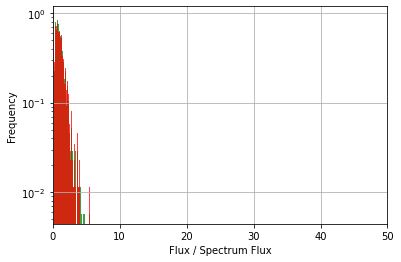

In [2]:
flux_proportionHSP10 = []

for item in lc_downloaded_HSP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 10) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionHSP10.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionHSP10)



plot_histogram(flux_proportionHSP10, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 50%

Source J0030.2-1647 percentage: 95.0
Source J0033.5-1921 percentage: 48.0
 >>> Source J0033.5-1921 selected!
Source J0051.2-6242 percentage: 89.0
Source J0143.7-5846 percentage: 74.0
Source J0156.8-4744 percentage: 91.0
Source J0156.9-5301 percentage: 88.0
Source J0209.3-5228 percentage: 63.0
Source J0216.8-6635 percentage: 82.0
Source J0226.5-4441 percentage: 91.0
Source J0237.6-3602 percentage: 93.0
Source J0238.1-3905 percentage: 90.0
Source J0238.4-3116 percentage: 79.0
Source J0244.6-5819 percentage: 86.0
Source J0303.4-2407 percentage: 27.0
 >>> Source J0303.4-2407 selected!
Source J0305.1-1608 percentage: 94.0
Source J0310.6-5017 percentage: 91.0
Source J0325.5-5635 percentage: 87.0
Source J0325.6-1646 percentage: 77.0
Source J0331.3-6156 percentage: 97.0
Source J0335.1-4459 percentage: 88.0
Source J0449.4-4350 percentage: 9.0
 >>> Source J0449.4-4350 selected!
Source J0509.9-6417 percentage: 91.0
Source J0538.2-3910 percentage: 96.0
Source J0543.9-5531 percentage: 72.0


/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0622.3-2605 percentage: 57.0
Source J0626.4-4259 percentage: 93.0
Source J0630.9-2406 percentage: 33.0
 >>> Source J0630.9-2406 selected!
Source J0746.6-4754 percentage: 79.0
Source J0803.2-0337 percentage: 78.0
Source J0816.4-1311 percentage: 67.0
Source J0841.3-3554 percentage: 76.0
Source J0953.0-0840 percentage: 54.0
Source J1010.2-3119 percentage: 87.0
Source J1023.8-4335 percentage: 79.0
Source J1026.9-1749 percentage: 86.0
Source J1141.5-1408 percentage: 95.0
Source J1304.3-4353 percentage: 99.0
Source J1307.6-4259 percentage: 93.0
Source J1310.7-5553 percentage: 99.0
Source J1312.4-2156 percentage: 100.0
Source J1315.9-0732 percentage: 93.0
Source J1416.1-2417 percentage: 96.0
Source J1418.4-0233 percentage: 57.0
Source J1424.1-1750 percentage: 95.0
Source J1443.9-3908 percentage: 71.0
Source J1518.0-2731 percentage: 94.0
Source J1546.1-1003 percentage: 94.0
Source J1548.8-2250 percentage: 84.0
Source J1553.5-3118 percentage: 97.0
Source J1610.7-6648 percentage: 57.0
So

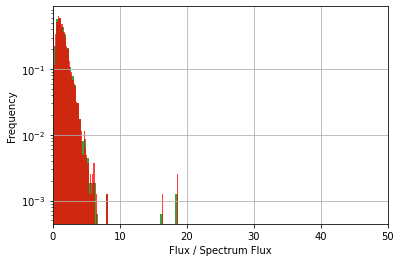

In [3]:
flux_proportionHSP50 = []

for item in lc_downloaded_HSP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 50) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionHSP50.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionHSP50)



plot_histogram(flux_proportionHSP50, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 90%

Source J0030.2-1647 percentage: 95.0
Source J0033.5-1921 percentage: 48.0
 >>> Source J0033.5-1921 selected!
Source J0051.2-6242 percentage: 89.0
 >>> Source J0051.2-6242 selected!
Source J0143.7-5846 percentage: 74.0
 >>> Source J0143.7-5846 selected!
Source J0156.8-4744 percentage: 91.0
Source J0156.9-5301 percentage: 88.0
 >>> Source J0156.9-5301 selected!
Source J0209.3-5228 percentage: 63.0
 >>> Source J0209.3-5228 selected!
Source J0216.8-6635 percentage: 82.0
 >>> Source J0216.8-6635 selected!
Source J0226.5-4441 percentage: 91.0
Source J0237.6-3602 percentage: 93.0
Source J0238.1-3905 percentage: 90.0
Source J0238.4-3116 percentage: 79.0
 >>> Source J0238.4-3116 selected!
Source J0244.6-5819 percentage: 86.0
 >>> Source J0244.6-5819 selected!
Source J0303.4-2407 percentage: 27.0
 >>> Source J0303.4-2407 selected!
Source J0305.1-1608 percentage: 94.0
Source J0310.6-5017 percentage: 91.0
Source J0325.5-5635 percentage: 87.0
 >>> Source J0325.5-5635 selected!
Source J0325.6-1646 p

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


 67.0
 >>> Source J0816.4-1311 selected!
Source J0841.3-3554 percentage: 76.0
 >>> Source J0841.3-3554 selected!
Source J0953.0-0840 percentage: 54.0
 >>> Source J0953.0-0840 selected!
Source J1010.2-3119 percentage: 87.0
 >>> Source J1010.2-3119 selected!
Source J1023.8-4335 percentage: 79.0
 >>> Source J1023.8-4335 selected!
Source J1026.9-1749 percentage: 86.0
 >>> Source J1026.9-1749 selected!
Source J1141.5-1408 percentage: 95.0
Source J1304.3-4353 percentage: 99.0
Source J1307.6-4259 percentage: 93.0
Source J1310.7-5553 percentage: 99.0
Source J1312.4-2156 percentage: 100.0
Source J1315.9-0732 percentage: 93.0
Source J1416.1-2417 percentage: 96.0
Source J1418.4-0233 percentage: 57.0
 >>> Source J1418.4-0233 selected!
Source J1424.1-1750 percentage: 95.0
Source J1443.9-3908 percentage: 71.0
 >>> Source J1443.9-3908 selected!
Source J1518.0-2731 percentage: 94.0
Source J1546.1-1003 percentage: 94.0
Source J1548.8-2250 percentage: 84.0
 >>> Source J1548.8-2250 selected!
Source J1553

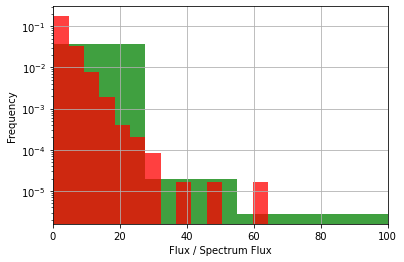

In [4]:
flux_proportionHSP90 = []

for item in lc_downloaded_HSP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 90) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionHSP90.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionHSP90)



plot_histogram(flux_proportionHSP90, 100, 600, 0, 100)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

### Intermediate Synchrotron Peak

#### 10%

Source J0021.5-2552 percentage: 84.0
Source J0021.9-5140 percentage: 100.0
Source J0050.7-0929 percentage: 39.0
Source J0056.3-0935 percentage: 85.0
Source J0056.4-2118 percentage: 78.0
Source J0056.6-5317 percentage: 96.0
Source J0111.5-2546 percentage: 97.0
Source J0120.4-2701 percentage: 37.0
Source J0146.0-6746 percentage: 89.0
Source J0158.5-3932 percentage: 81.0
Source J0218.9-2305 percentage: 93.0
Source J0343.2-6444 percentage: 95.0
Source J0345.2-2353 percentage: 70.0
Source J0409.8-0359 percentage: 87.0
Source J0434.1-2014 percentage: 91.0
Source J0532.0-4827 percentage: 61.0
Source J0615.3-3117 percentage: 93.0
Source J0700.5-6610 percentage: 25.0
Source J0703.3-0050 percentage: 86.0
Source J0730.5-0535 percentage: 79.0
Source J0746.3-0225 percentage: 91.0
Source J0807.1-0541 percentage: 84.0
Source J0811.0-7529 percentage: 55.0
Source J0814.2-1013 percentage: 79.0
Source J0849.4-2911 percentage: 92.0
Source J0900.7-1243 percentage: 92.0
Source J0937.9-1434 percentage: 93.0


/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),


Source J1110.5-1836 percentage: 90.0
Source J1113.6-1920 percentage: 97.0
Source J1118.2-4634 percentage: 92.0
Source J1123.5-6418 percentage: 96.0
Source J1125.5-3557 percentage: 89.0
Source J1204.2-0709 percentage: 84.0
Source J1233.7-0144 percentage: 84.0
Source J1234.0-5735 percentage: 99.0
Source J1238.1-4541 percentage: 99.0
Source J1345.6-3356 percentage: 91.0
Source J1349.5-1131 percentage: 81.0
Source J1359.8-3746 percentage: 88.0
Source J1406.1-2508 percentage: 93.0
Source J1406.6-3934 percentage: 98.0
Source J1427.7-3215 percentage: 92.0
Source J1603.8-4903 percentage: 97.0
Source J1626.6-7639 percentage: 91.0
Source J1704.5-0527 percentage: 87.0
Source J1744.6-5713 percentage: 99.0
Source J1921.8-1607 percentage: 85.0
Source J2016.3-0903 percentage: 79.0
Source J2022.3-4513 percentage: 100.0
Source J2103.8-6233 percentage: 97.0
Source J2134.5-2130 percentage: 99.0
Source J2139.4-4235 percentage: 65.0
Source J2228.6-1636 percentage: 94.0
Source J2235.8-3627 percentage: 77.0


/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


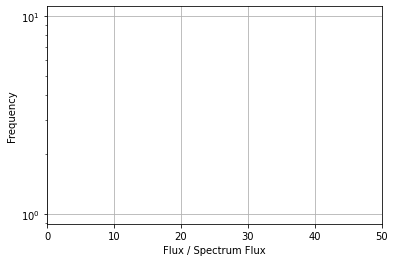

In [5]:
flux_proportionISP10 = []

for item in lc_downloaded_ISP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 10) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionISP10.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionISP10)



plot_histogram(flux_proportionISP10, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 50%

Source J0021.5-2552 percentage: 84.0
Source J0021.9-5140 percentage: 100.0
Source J0050.7-0929 percentage: 39.0
 >>> Source J0050.7-0929 selected!
Source J0056.3-0935 percentage: 85.0
Source J0056.4-2118 percentage: 78.0
Source J0056.6-5317 percentage: 96.0
Source J0111.5-2546 percentage: 97.0
Source J0120.4-2701 percentage: 37.0
 >>> Source J0120.4-2701 selected!
Source J0146.0-6746 percentage: 89.0
Source J0158.5-3932 percentage: 81.0
Source J0218.9-2305 percentage: 93.0
Source J0343.2-6444 percentage: 95.0
Source J0345.2-2353 percentage: 70.0
Source J0409.8-0359 percentage: 87.0
Source J0434.1-2014 percentage: 91.0
Source J0532.0-4827 percentage: 61.0
Source J0615.3-3117 percentage: 93.0
Source J0700.5-6610 percentage: 25.0
 >>> Source J0700.5-6610 selected!
Source J0703.3-0050 percentage: 86.0
Source J0730.5-0535 percentage: 79.0
Source J0746.3-0225 percentage: 91.0
Source J0807.1-0541 percentage: 84.0
Source J0811.0-7529 percentage: 55.0
Source J0814.2-1013 percentage: 79.0


/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),


Source J0849.4-2911 percentage: 92.0
Source J0900.7-1243 percentage: 92.0
Source J0937.9-1434 percentage: 93.0
Source J1110.5-1836 percentage: 90.0
Source J1113.6-1920 percentage: 97.0
Source J1118.2-4634 percentage: 92.0
Source J1123.5-6418 percentage: 96.0
Source J1125.5-3557 percentage: 89.0
Source J1204.2-0709 percentage: 84.0
Source J1233.7-0144 percentage: 84.0
Source J1234.0-5735 percentage: 99.0
Source J1238.1-4541 percentage: 99.0
Source J1345.6-3356 percentage: 91.0
Source J1349.5-1131 percentage: 81.0
Source J1359.8-3746 percentage: 88.0
Source J1406.1-2508 percentage: 93.0
Source J1406.6-3934 percentage: 98.0
Source J1427.7-3215 percentage: 92.0
Source J1603.8-4903 percentage: 97.0
Source J1626.6-7639 percentage: 91.0
Source J1704.5-0527 percentage: 87.0
Source J1744.6-5713 percentage: 99.0
Source J1921.8-1607 percentage: 85.0
Source J2016.3-0903 percentage: 79.0
Source J2022.3-4513 percentage: 100.0
Source J2103.8-6233 percentage: 97.0
Source J2134.5-2130 percentage: 99.0


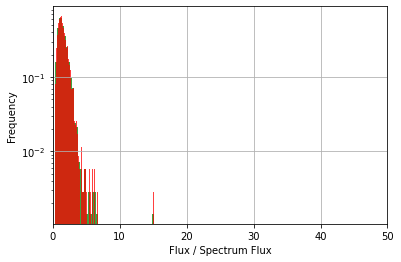

In [6]:
flux_proportionISP50 = []

for item in lc_downloaded_ISP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 50) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionISP50.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionISP50)



plot_histogram(flux_proportionISP50, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 90%

Source J0021.5-2552 percentage: 84.0
 >>> Source J0021.5-2552 selected!
Source J0021.9-5140 percentage: 100.0
Source J0050.7-0929 percentage: 39.0
 >>> Source J0050.7-0929 selected!
Source J0056.3-0935 percentage: 85.0
 >>> Source J0056.3-0935 selected!
Source J0056.4-2118 percentage: 78.0
 >>> Source J0056.4-2118 selected!
Source J0056.6-5317 percentage: 96.0
Source J0111.5-2546 percentage: 97.0
Source J0120.4-2701 percentage: 37.0
 >>> Source J0120.4-2701 selected!
Source J0146.0-6746 percentage: 89.0
 >>> Source J0146.0-6746 selected!
Source J0158.5-3932 percentage: 81.0
 >>> Source J0158.5-3932 selected!
Source J0218.9-2305 percentage: 93.0
Source J0343.2-6444 percentage: 95.0
Source J0345.2-2353 percentage: 70.0
 >>> Source J0345.2-2353 selected!
Source J0409.8-0359 percentage: 87.0
 >>> Source J0409.8-0359 selected!
Source J0434.1-2014 percentage: 91.0
Source J0532.0-4827 percentage: 61.0
 >>> Source J0532.0-4827 selected!
Source J0615.3-3117 percentage: 93.0
Source J0700.5-6610 

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),


 96.0
Source J1125.5-3557 percentage: 89.0
 >>> Source J1125.5-3557 selected!
Source J1204.2-0709 percentage: 84.0
 >>> Source J1204.2-0709 selected!
Source J1233.7-0144 percentage: 84.0
 >>> Source J1233.7-0144 selected!
Source J1234.0-5735 percentage: 99.0
Source J1238.1-4541 percentage: 99.0
Source J1345.6-3356 percentage: 91.0
Source J1349.5-1131 percentage: 81.0
 >>> Source J1349.5-1131 selected!
Source J1359.8-3746 percentage: 88.0
 >>> Source J1359.8-3746 selected!
Source J1406.1-2508 percentage: 93.0
Source J1406.6-3934 percentage: 98.0
Source J1427.7-3215 percentage: 92.0
Source J1603.8-4903 percentage: 97.0
Source J1626.6-7639 percentage: 91.0
Source J1704.5-0527 percentage: 87.0
 >>> Source J1704.5-0527 selected!
Source J1744.6-5713 percentage: 99.0
Source J1921.8-1607 percentage: 85.0
 >>> Source J1921.8-1607 selected!
Source J2016.3-0903 percentage: 79.0
 >>> Source J2016.3-0903 selected!
Source J2022.3-4513 percentage: 100.0
Source J2103.8-6233 percentage: 97.0
Source J21

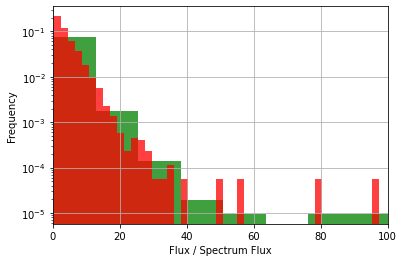

In [7]:
flux_proportionISP90 = []

for item in lc_downloaded_ISP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 90) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionISP90.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionISP90)



plot_histogram(flux_proportionISP90, 100, 600, 0, 100)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

### Low Synchrotron Peak

#### 10%

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0001.2-0747 percentage: 79.0
Source J0003.3-1928 percentage: 89.0
Source J0004.4-4737 percentage: 83.0
Source J0010.6-3025 percentage: 87.0
Source J0014.3-0500 percentage: 90.0
Source J0016.2-0016 percentage: 79.0
Source J0017.0-0649 percentage: 90.0
Source J0017.5-0514 percentage: 77.0
Source J0019.2-5640 percentage: 99.0
Source J0023.7-6820 percentage: 86.0
Source J0025.7-4801 percentage: 100.0
Source J0029.0-7044 percentage: 88.0
Source J0030.3-4224 percentage: 65.0
Source J0030.6-0212 percentage: 72.0
Source J0034.0-4116 percentage: 95.0
Source J0038.2-2459 percentage: 87.0
Source J0044.2-8424 percentage: 93.0
Source J0045.1-3706 percentage: 82.0
Source J0050.0-5736 percentage: 85.0
Source J0050.4-0452 percentage: 77.0
Source J0051.1-0648 percentage: 79.0
Source J0051.5-4220 percentage: 88.0
Source J0055.1-1219 percentage: 90.0
Source J0058.0-0539 percentage: 87.0
Source J0058.0-3233 percentage: 66.0
Source J0104.8-2416 percentage: 85.0
Source J0112.0-6634 percentage: 92.0


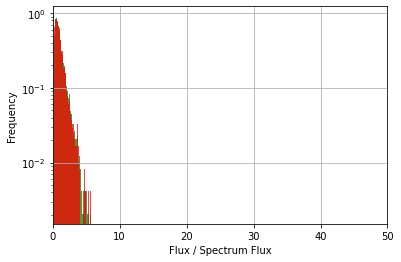

In [8]:
flux_proportionLSP10 = []

for item in lc_downloaded_LSP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, flux_from_spectrum
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 10) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, flux_from_spectrum, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionLSP10.extend(json_data[2] / table_params[3])  # flux / flux_from_spectrum
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionLSP10)



plot_histogram(flux_proportionLSP10, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 50%

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0001.2-0747 percentage: 79.0
Source J0003.3-1928 percentage: 89.0
Source J0004.4-4737 percentage: 83.0
Source J0010.6-3025 percentage: 87.0
Source J0014.3-0500 percentage: 90.0
Source J0016.2-0016 percentage: 79.0
Source J0017.0-0649 percentage: 90.0
Source J0017.5-0514 percentage: 77.0
Source J0019.2-5640 percentage: 99.0
Source J0023.7-6820 percentage: 86.0
Source J0025.7-4801 percentage: 100.0
Source J0029.0-7044 percentage: 88.0
Source J0030.3-4224 percentage: 65.0
Source J0030.6-0212 percentage: 72.0
Source J0034.0-4116 percentage: 95.0
Source J0038.2-2459 percentage: 87.0
Source J0044.2-8424 percentage: 93.0
Source J0045.1-3706 percentage: 82.0
Source J0050.0-5736 percentage: 85.0
Source J0050.4-0452 percentage: 77.0
Source J0051.1-0648 percentage: 79.0
Source J0051.5-4220 percentage: 88.0
Source J0055.1-1219 percentage: 90.0
Source J0058.0-0539 percentage: 87.0
Source J0058.0-3233 percentage: 66.0
Source J0104.8-2416 percentage: 85.0
Source J0112.0-6634 percentage: 92.0


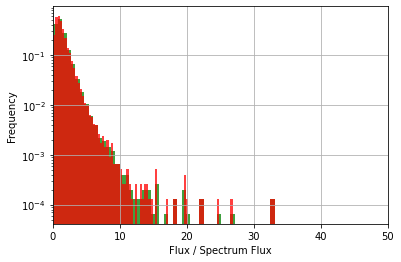

In [9]:
flux_proportionLSP50 = []

for item in lc_downloaded_LSP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 50) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionLSP50.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionLSP50)



plot_histogram(flux_proportionLSP50, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim



#### 90%

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0001.2-0747 percentage: 79.0
 >>> Source J0001.2-0747 selected!
Source J0003.3-1928 percentage: 89.0
 >>> Source J0003.3-1928 selected!
Source J0004.4-4737 percentage: 83.0
 >>> Source J0004.4-4737 selected!
Source J0010.6-3025 percentage: 87.0
 >>> Source J0010.6-3025 selected!
Source J0014.3-0500 percentage: 90.0
Source J0016.2-0016 percentage: 79.0
 >>> Source J0016.2-0016 selected!
Source J0017.0-0649 percentage: 90.0
 >>> Source J0017.0-0649 selected!
Source J0017.5-0514 percentage: 77.0
 >>> Source J0017.5-0514 selected!
Source J0019.2-5640 percentage: 99.0
Source J0023.7-6820 percentage: 86.0
 >>> Source J0023.7-6820 selected!
Source J0025.7-4801 percentage: 100.0
Source J0029.0-7044 percentage: 88.0
 >>> Source J0029.0-7044 selected!
Source J0030.3-4224 percentage: 65.0
 >>> Source J0030.3-4224 selected!
Source J0030.6-0212 percentage: 72.0
 >>> Source J0030.6-0212 selected!
Source J0034.0-4116 percentage: 95.0
Source J0038.2-2459 percentage: 87.0
 >>> Source J0038.2-24

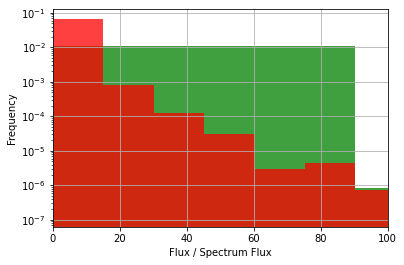

In [10]:
flux_proportionLSP90 = []

for item in lc_downloaded_LSP_3days:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('3-days', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 90) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionLSP90.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionLSP90)



plot_histogram(flux_proportionLSP90, 100, 600, 0, 100)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

### LSP + ISP + HSP

#### 10%

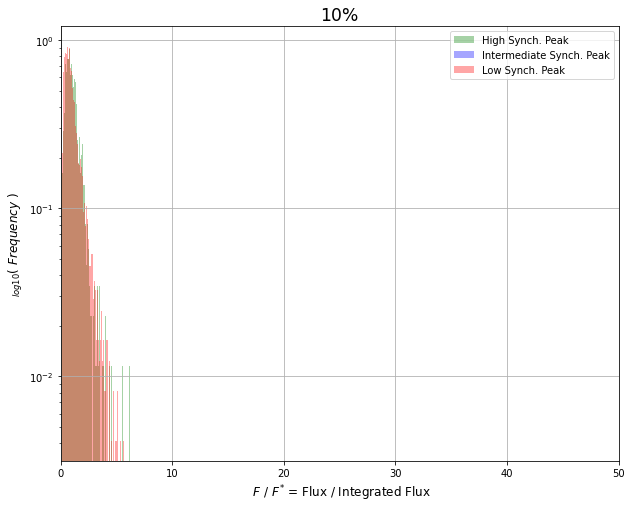

In [11]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(flux_proportionHSP10, 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(flux_proportionISP10, 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(flux_proportionLSP10, 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('10%', fontsize='xx-large')
plt.xlabel(r' $F$ / $F^{*}$ = Flux / Integrated Flux', fontsize=12)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=12)

plt.xlim(0, 50)
plt.yscale('log')

plt.legend()

plt.grid(True)
plt.show()

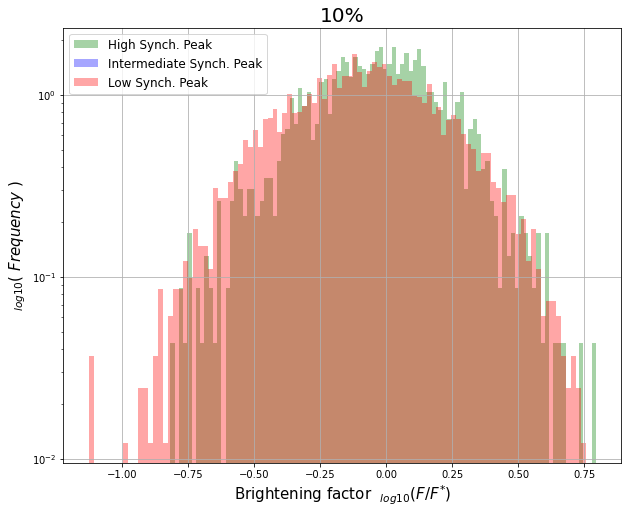

In [12]:
plt.figure(figsize=(10,8))

n1, bins1, patches1 = plt.hist(np.log10(flux_proportionHSP10), 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n2, bins2, patches2 = plt.hist(np.log10(flux_proportionISP10), 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n3, bins3, patches3 = plt.hist(np.log10(flux_proportionLSP10), 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('10%', fontsize=20)
plt.xlabel(r'Brightening factor  $_{log10}\left ( F / F^{*} \right )$', fontsize=15)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=15)

plt.yscale('log')

plt.legend(prop={'size': 12})

plt.grid(True)
plt.show()

#### 50%

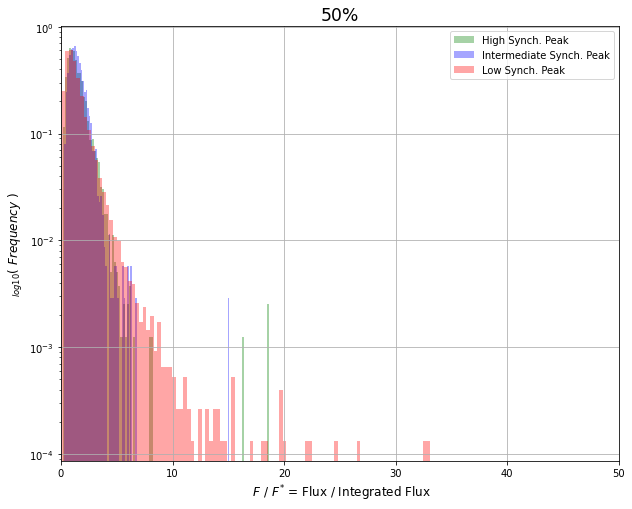

In [13]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(flux_proportionHSP50, 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(flux_proportionISP50, 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(flux_proportionLSP50, 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('50%', fontsize='xx-large')
plt.xlabel(r' $F$ / $F^{*}$ = Flux / Integrated Flux', fontsize=12)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=12)

plt.xlim(0, 50)
plt.yscale('log')

plt.legend()

plt.grid(True)
plt.show()

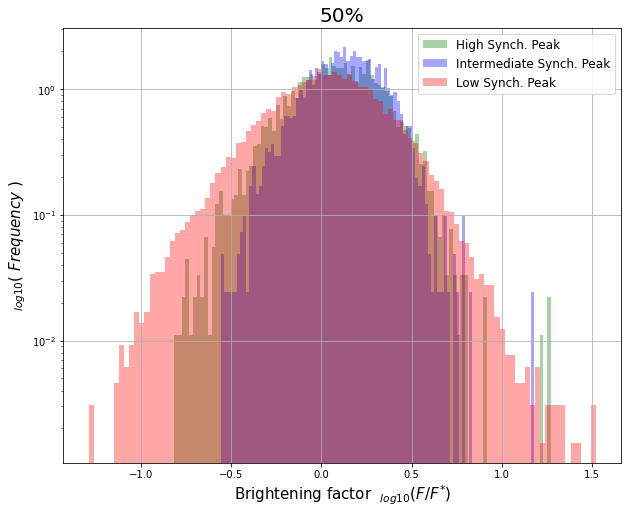

In [14]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(np.log10(flux_proportionHSP50), 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionISP50), 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionLSP50), 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('50%', fontsize=20)
plt.xlabel(r'Brightening factor  $_{log10}\left ( F / F^{*} \right )$', fontsize=15)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=15)

plt.yscale('log')

plt.legend(prop={'size': 12})

plt.grid(True)
plt.show()

#### 90%

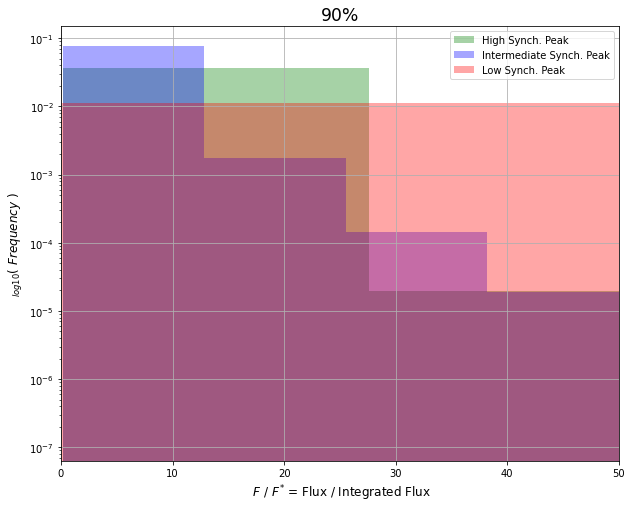

In [15]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(flux_proportionHSP90, 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(flux_proportionISP90, 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(flux_proportionLSP90, 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('90%', fontsize='xx-large')
plt.xlabel(r' $F$ / $F^{*}$ = Flux / Integrated Flux', fontsize=12)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=12)

plt.xlim(0, 50)
plt.yscale('log')

plt.legend()

plt.grid(True)
plt.show()

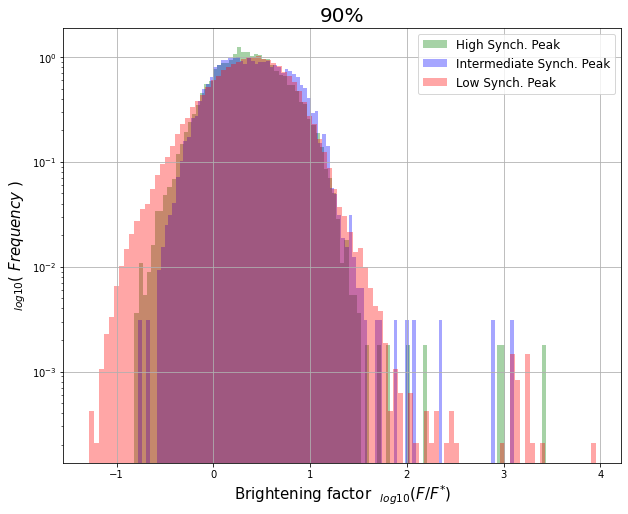

In [16]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(np.log10(flux_proportionHSP90), 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionISP90), 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionLSP90), 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('90%', fontsize=20)
plt.xlabel(r'Brightening factor  $_{log10}\left ( F / F^{*} \right )$', fontsize=15)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=15)

plt.yscale('log')

plt.legend(prop={'size': 12})

plt.grid(True)
plt.show()

## Weekly bin

### High Synchrotron Peak

#### 10%

Source J0030.2-1647 percentage: 86.0
Source J0033.5-1921 percentage: 24.0
Source J0051.2-6242 percentage: 45.0
Source J0143.7-5846 percentage: 57.0
Source J0156.8-4744 percentage: 85.0
Source J0156.9-5301 percentage: 78.0
Source J0209.3-5228 percentage: 47.0
Source J0216.8-6635 percentage: 71.0
Source J0226.5-4441 percentage: 84.0
Source J0237.6-3602 percentage: 90.0
Source J0238.1-3905 percentage: 81.0
Source J0238.4-3116 percentage: 63.0
Source J0244.6-5819 percentage: 78.0
Source J0303.4-2407 percentage: 5.0
 >>> Source J0303.4-2407 selected!
Source J0305.1-1608 percentage: 88.0
Source J0310.6-5017 percentage: 84.0
Source J0325.5-5635 percentage: 80.0
Source J0325.6-1646 percentage: 64.0
Source J0331.3-6156 percentage: 72.0
Source J0335.1-4459 percentage: 79.0
Source J0449.4-4350 percentage: 2.0
 >>> Source J0449.4-4350 selected!
Source J0509.9-6417 percentage: 87.0
Source J0538.2-3910 percentage: 92.0
Source J0543.9-5531 percentage: 57.0
Source J0622.3-2605 percentage: 38.0
Source 

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J1518.0-2731 percentage: 97.0
Source J1546.1-1003 percentage: 90.0
Source J1548.8-2250 percentage: 73.0
Source J1553.5-3118 percentage: 65.0
Source J1610.7-6648 percentage: 35.0
Source J1714.0-2029 percentage: 92.0
Source J1823.6-3453 percentage: 98.0
Source J1917.7-1921 percentage: 32.0
Source J1922.5-7453 percentage: 87.0
Source J1955.1-1604 percentage: 88.0
Source J2009.4-4849 percentage: 96.0
Source J2131.0-2746 percentage: 99.0
Source J2131.5-0916 percentage: 79.0
Source J2143.1-3929 percentage: 82.0
Source J2158.8-3013 percentage: 91.0
Source J2221.5-5225 percentage: 70.0
Source J2317.4-4533 percentage: 77.0
Source J2322.8-4916 percentage: 72.0
Source J2324.7-4041 percentage: 67.0
Source J2350.6-3005 percentage: 82.0
Source J2355.7-3351 percentage: 79.0


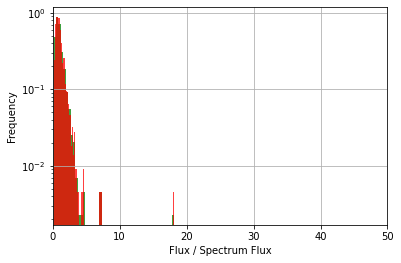

In [17]:
flux_proportionHSP10 = []

n_HSP10 = []

for item in lc_downloaded_HSP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, flux_from_spectrum
    
    ## number of bins
    n_HSP10.append(len(json_data[1]) + len(json_data[6]))
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 10) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, flux_from_spectrum, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionHSP10.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionHSP10)



plot_histogram(flux_proportionHSP10, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 50%

Source J0030.2-1647 percentage: 86.0
Source J0033.5-1921 percentage: 24.0
 >>> Source J0033.5-1921 selected!
Source J0051.2-6242 percentage: 45.0
 >>> Source J0051.2-6242 selected!
Source J0143.7-5846 percentage: 57.0
Source J0156.8-4744 percentage: 85.0
Source J0156.9-5301 percentage: 78.0
Source J0209.3-5228 percentage: 47.0
 >>> Source J0209.3-5228 selected!
Source J0216.8-6635 percentage: 71.0
Source J0226.5-4441 percentage: 84.0
Source J0237.6-3602 percentage: 90.0
Source J0238.1-3905 percentage: 81.0
Source J0238.4-3116 percentage: 63.0
Source J0244.6-5819 percentage: 78.0
Source J0303.4-2407 percentage: 5.0
 >>> Source J0303.4-2407 selected!
Source J0305.1-1608 percentage: 88.0
Source J0310.6-5017 percentage: 84.0
Source J0325.5-5635 percentage: 80.0
Source J0325.6-1646 percentage: 64.0
Source J0331.3-6156 percentage: 72.0
Source J0335.1-4459 percentage: 79.0
Source J0449.4-4350 percentage: 2.0
 >>> Source J0449.4-4350 selected!
Source J0509.9-6417 percentage: 87.0
Source J0538.

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


 92.0
Source J1823.6-3453 percentage: 98.0
Source J1917.7-1921 percentage: 32.0
 >>> Source J1917.7-1921 selected!
Source J1922.5-7453 percentage: 87.0
Source J1955.1-1604 percentage: 88.0
Source J2009.4-4849 percentage: 96.0
Source J2131.0-2746 percentage: 99.0
Source J2131.5-0916 percentage: 79.0
Source J2143.1-3929 percentage: 82.0
Source J2158.8-3013 percentage: 91.0
Source J2221.5-5225 percentage: 70.0
Source J2317.4-4533 percentage: 77.0
Source J2322.8-4916 percentage: 72.0
Source J2324.7-4041 percentage: 67.0
Source J2350.6-3005 percentage: 82.0
Source J2355.7-3351 percentage: 79.0


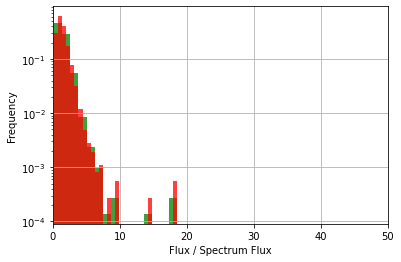

In [18]:
flux_proportionHSP50 = []

n_HSP50 = []

for item in lc_downloaded_HSP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    n_HSP50.append(len(json_data[1]) + len(json_data[6]))
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 50) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionHSP50.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionHSP50)



plot_histogram(flux_proportionHSP50, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 90%

Source J0030.2-1647 percentage: 86.0
 >>> Source J0030.2-1647 selected!
Source J0033.5-1921 percentage: 24.0
 >>> Source J0033.5-1921 selected!
Source J0051.2-6242 percentage: 45.0
 >>> Source J0051.2-6242 selected!
Source J0143.7-5846 percentage: 57.0
 >>> Source J0143.7-5846 selected!
Source J0156.8-4744 percentage: 85.0
 >>> Source J0156.8-4744 selected!
Source J0156.9-5301 percentage: 78.0
 >>> Source J0156.9-5301 selected!
Source J0209.3-5228 percentage: 47.0
 >>> Source J0209.3-5228 selected!
Source J0216.8-6635 percentage: 71.0
 >>> Source J0216.8-6635 selected!
Source J0226.5-4441 percentage: 84.0
 >>> Source J0226.5-4441 selected!
Source J0237.6-3602 percentage: 90.0
 >>> Source J0237.6-3602 selected!
Source J0238.1-3905 percentage: 81.0
 >>> Source J0238.1-3905 selected!
Source J0238.4-3116 percentage: 63.0
 >>> Source J0238.4-3116 selected!
Source J0244.6-5819 percentage: 78.0
 >>> Source J0244.6-5819 selected!
Source J0303.4-2407 percentage: 5.0
 >>> Source J0303.4-2407 sel

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


 65.0
 >>> Source J1553.5-3118 selected!
Source J1610.7-6648 percentage: 35.0
 >>> Source J1610.7-6648 selected!
Source J1714.0-2029 percentage: 92.0
Source J1823.6-3453 percentage: 98.0
Source J1917.7-1921 percentage: 32.0
 >>> Source J1917.7-1921 selected!
Source J1922.5-7453 percentage: 87.0
 >>> Source J1922.5-7453 selected!
Source J1955.1-1604 percentage: 88.0
 >>> Source J1955.1-1604 selected!
Source J2009.4-4849 percentage: 96.0
Source J2131.0-2746 percentage: 99.0
Source J2131.5-0916 percentage: 79.0
 >>> Source J2131.5-0916 selected!
Source J2143.1-3929 percentage: 82.0
 >>> Source J2143.1-3929 selected!
Source J2158.8-3013 percentage: 91.0
Source J2221.5-5225 percentage: 70.0
 >>> Source J2221.5-5225 selected!
Source J2317.4-4533 percentage: 77.0
 >>> Source J2317.4-4533 selected!
Source J2322.8-4916 percentage: 72.0
 >>> Source J2322.8-4916 selected!
Source J2324.7-4041 percentage: 67.0
 >>> Source J2324.7-4041 selected!
Source J2350.6-3005 percentage: 82.0
 >>> Source J2350

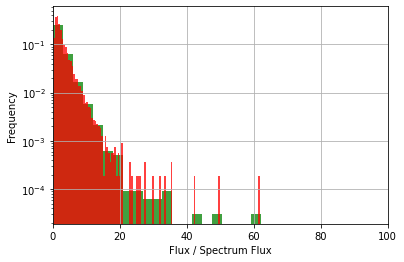

In [19]:
flux_proportionHSP90 = []

n_HSP90 = []

for item in lc_downloaded_HSP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    n_HSP90.append(len(json_data[1]) + len(json_data[6]))
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 90) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionHSP90.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionHSP90)



plot_histogram(flux_proportionHSP90, 100, 600, 0, 100)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

### Intermediate Synchrotron Peak

#### 10%

Source J0021.5-2552 percentage: 74.0
Source J0021.9-5140 percentage: 72.0
Source J0050.7-0929 percentage: 17.0
Source J0056.3-0935 percentage: 74.0
Source J0056.4-2118 percentage: 65.0
Source J0056.6-5317 percentage: 92.0
Source J0111.5-2546 percentage: 94.0
Source J0120.4-2701 percentage: 14.0
Source J0146.0-6746 percentage: 80.0
Source J0158.5-3932 percentage: 70.0
Source J0218.9-2305 percentage: 90.0
Source J0343.2-6444 percentage: 67.0
Source J0345.2-2353 percentage: 53.0
Source J0409.8-0359 percentage: 78.0
Source J0434.1-2014 percentage: 86.0
Source J0532.0-4827 percentage: 48.0
Source J0615.3-3117 percentage: 86.0
Source J0700.5-6610 percentage: 3.0
 >>> Source J0700.5-6610 selected!
Source J0703.3-0050 percentage: 80.0
Source J0730.5-0535 percentage: 68.0
Source J0746.3-0225 percentage: 83.0
Source J0807.1-0541 percentage: 58.0
Source J0811.0-7529 percentage: 33.0
Source J0814.2-1013 percentage: 69.0
Source J0849.4-2911 percentage: 84.0
Source J0900.7-1243 percentage: 87.0
Sour

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),


Source J2022.3-4513 percentage: 99.0
Source J2103.8-6233 percentage: 97.0
Source J2134.5-2130 percentage: 98.0
Source J2139.4-4235 percentage: 17.0
Source J2228.6-1636 percentage: 89.0
Source J2235.8-3627 percentage: 63.0
Source J2250.4-4206 percentage: 99.0
Source J2251.5-4928 percentage: 78.0
Source J2254.8-2725 percentage: 90.0
Source J2258.5-8247 percentage: 84.0
Source J2321.7-6438 percentage: 77.0
Source J2325.4-4800 percentage: 63.0


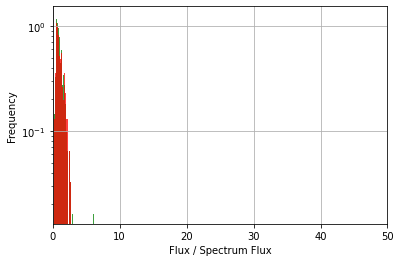

In [20]:
flux_proportionISP10 = []

for item in lc_downloaded_ISP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, flux_from_spectrum
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 10) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, flux_from_spectrum, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionISP10.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionISP10)



plot_histogram(flux_proportionISP10, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 50%

Source J0021.5-2552 percentage: 74.0
Source J0021.9-5140 percentage: 72.0
Source J0050.7-0929 percentage: 17.0
 >>> Source J0050.7-0929 selected!
Source J0056.3-0935 percentage: 74.0
Source J0056.4-2118 percentage: 65.0
Source J0056.6-5317 percentage: 92.0
Source J0111.5-2546 percentage: 94.0
Source J0120.4-2701 percentage: 14.0
 >>> Source J0120.4-2701 selected!
Source J0146.0-6746 percentage: 80.0
Source J0158.5-3932 percentage: 70.0
Source J0218.9-2305 percentage: 90.0
Source J0343.2-6444 percentage: 67.0
Source J0345.2-2353 percentage: 53.0
Source J0409.8-0359 percentage: 78.0
Source J0434.1-2014 percentage: 86.0
Source J0532.0-4827 percentage: 48.0
 >>> Source J0532.0-4827 selected!
Source J0615.3-3117 percentage: 86.0
Source J0700.5-6610 percentage: 3.0
 >>> Source J0700.5-6610 selected!
Source J0703.3-0050 percentage: 80.0
Source J0730.5-0535 percentage: 68.0
Source J0746.3-0225 percentage: 83.0
Source J0807.1-0541 percentage: 58.0
Source J0811.0-7529 percentage: 33.0
 >>> Sourc

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),


Source J1744.6-5713 percentage: 86.0
Source J1921.8-1607 percentage: 73.0
Source J2016.3-0903 percentage: 63.0
Source J2022.3-4513 percentage: 99.0
Source J2103.8-6233 percentage: 97.0
Source J2134.5-2130 percentage: 98.0
Source J2139.4-4235 percentage: 17.0
 >>> Source J2139.4-4235 selected!
Source J2228.6-1636 percentage: 89.0
Source J2235.8-3627 percentage: 63.0
Source J2250.4-4206 percentage: 99.0
Source J2251.5-4928 percentage: 78.0
Source J2254.8-2725 percentage: 90.0
Source J2258.5-8247 percentage: 84.0
Source J2321.7-6438 percentage: 77.0
Source J2325.4-4800 percentage: 63.0


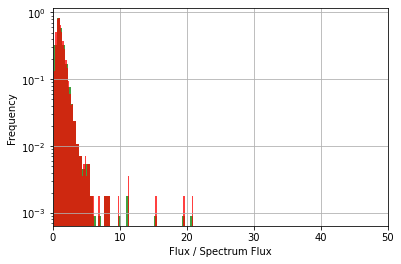

In [21]:
flux_proportionISP50 = []

for item in lc_downloaded_ISP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 50) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionISP50.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionISP50)



plot_histogram(flux_proportionISP50, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 90%

Source J0021.5-2552 percentage: 74.0
 >>> Source J0021.5-2552 selected!
Source J0021.9-5140 percentage: 72.0
 >>> Source J0021.9-5140 selected!
Source J0050.7-0929 percentage: 17.0
 >>> Source J0050.7-0929 selected!
Source J0056.3-0935 percentage: 74.0
 >>> Source J0056.3-0935 selected!
Source J0056.4-2118 percentage: 65.0
 >>> Source J0056.4-2118 selected!
Source J0056.6-5317 percentage: 92.0
Source J0111.5-2546 percentage: 94.0
Source J0120.4-2701 percentage: 14.0
 >>> Source J0120.4-2701 selected!
Source J0146.0-6746 percentage: 80.0
 >>> Source J0146.0-6746 selected!
Source J0158.5-3932 percentage: 70.0
 >>> Source J0158.5-3932 selected!
Source J0218.9-2305 percentage: 90.0
Source J0343.2-6444 percentage: 67.0
 >>> Source J0343.2-6444 selected!
Source J0345.2-2353 percentage: 53.0
 >>> Source J0345.2-2353 selected!
Source J0409.8-0359 percentage: 78.0
 >>> Source J0409.8-0359 selected!
Source J0434.1-2014 percentage: 86.0
 >>> Source J0434.1-2014 selected!
Source J0532.0-4827 perce

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),


 87.0
 >>> Source J1603.8-4903 selected!
Source J1626.6-7639 percentage: 85.0
 >>> Source J1626.6-7639 selected!
Source J1704.5-0527 percentage: 77.0
 >>> Source J1704.5-0527 selected!
Source J1744.6-5713 percentage: 86.0
 >>> Source J1744.6-5713 selected!
Source J1921.8-1607 percentage: 73.0
 >>> Source J1921.8-1607 selected!
Source J2016.3-0903 percentage: 63.0
 >>> Source J2016.3-0903 selected!
Source J2022.3-4513 percentage: 99.0
Source J2103.8-6233 percentage: 97.0
Source J2134.5-2130 percentage: 98.0
Source J2139.4-4235 percentage: 17.0
 >>> Source J2139.4-4235 selected!
Source J2228.6-1636 percentage: 89.0
 >>> Source J2228.6-1636 selected!
Source J2235.8-3627 percentage: 63.0
 >>> Source J2235.8-3627 selected!
Source J2250.4-4206 percentage: 99.0
Source J2251.5-4928 percentage: 78.0
 >>> Source J2251.5-4928 selected!
Source J2254.8-2725 percentage: 90.0
 >>> Source J2254.8-2725 selected!
Source J2258.5-8247 percentage: 84.0
 >>> Source J2258.5-8247 selected!
Source J2321.7-6438

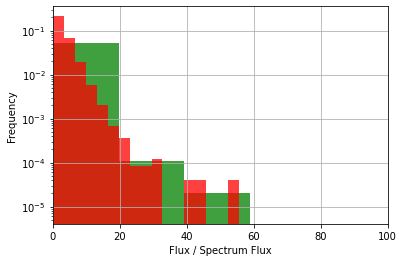

In [22]:
flux_proportionISP90 = []

for item in lc_downloaded_ISP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 90) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionISP90.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionISP90)



plot_histogram(flux_proportionISP90, 100, 600, 0, 100)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

### Low Synchrotron Peak

#### 10%

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0001.2-0747 percentage: 66.0
Source J0003.3-1928 percentage: 82.0
Source J0004.4-4737 percentage: 75.0
Source J0010.6-3025 percentage: 81.0
Source J0014.3-0500 percentage: 84.0
Source J0016.2-0016 percentage: 68.0
Source J0017.0-0649 percentage: 85.0
Source J0017.5-0514 percentage: 67.0
Source J0019.2-5640 percentage: 87.0
Source J0023.7-6820 percentage: 77.0
Source J0025.7-4801 percentage: 91.0
Source J0029.0-7044 percentage: 80.0
Source J0030.3-4224 percentage: 50.0
Source J0030.6-0212 percentage: 61.0
Source J0034.0-4116 percentage: 92.0
Source J0038.2-2459 percentage: 82.0
Source J0044.2-8424 percentage: 90.0
Source J0045.1-3706 percentage: 72.0
Source J0050.0-5736 percentage: 79.0
Source J0050.4-0452 percentage: 66.0
Source J0051.1-0648 percentage: 70.0
Source J0051.5-4220 percentage: 83.0
Source J0055.1-1219 percentage: 85.0
Source J0058.0-0539 percentage: 79.0
Source J0058.0-3233 percentage: 50.0
Source J0104.8-2416 percentage: 77.0
Source J0112.0-6634 percentage: 87.0
S

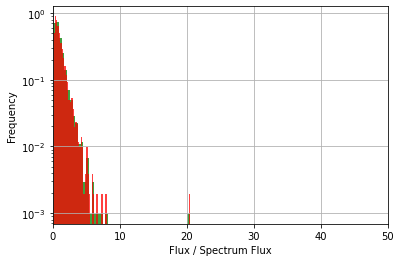

In [23]:
flux_proportionLSP10 = []

for item in lc_downloaded_LSP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 10) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionLSP10.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionLSP10)



plot_histogram(flux_proportionLSP10, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 50%

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0001.2-0747 percentage: 66.0
Source J0003.3-1928 percentage: 82.0
Source J0004.4-4737 percentage: 75.0
Source J0010.6-3025 percentage: 81.0
Source J0014.3-0500 percentage: 84.0
Source J0016.2-0016 percentage: 68.0
Source J0017.0-0649 percentage: 85.0
Source J0017.5-0514 percentage: 67.0
Source J0019.2-5640 percentage: 87.0
Source J0023.7-6820 percentage: 77.0
Source J0025.7-4801 percentage: 91.0
Source J0029.0-7044 percentage: 80.0
Source J0030.3-4224 percentage: 50.0
 >>> Source J0030.3-4224 selected!
Source J0030.6-0212 percentage: 61.0
Source J0034.0-4116 percentage: 92.0
Source J0038.2-2459 percentage: 82.0
Source J0044.2-8424 percentage: 90.0
Source J0045.1-3706 percentage: 72.0
Source J0050.0-5736 percentage: 79.0
Source J0050.4-0452 percentage: 66.0
Source J0051.1-0648 percentage: 70.0
Source J0051.5-4220 percentage: 83.0
Source J0055.1-1219 percentage: 85.0
Source J0058.0-0539 percentage: 79.0
Source J0058.0-3233 percentage: 50.0
 >>> Source J0058.0-3233 selected!
Sourc

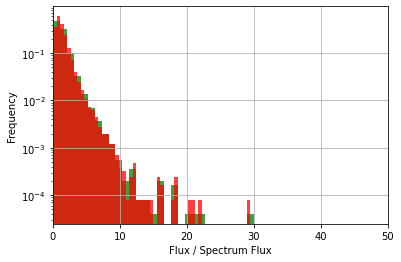

In [24]:
flux_proportionLSP50 = []

for item in lc_downloaded_LSP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 50) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionLSP50.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionLSP50)



plot_histogram(flux_proportionLSP50, 50, 100, 0, 50)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

#### 90%

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:183: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha)),
/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_31042/3380484928.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrateflux = integrate.quad(lambda x: K * ((x/E0)**(-alpha - beta * np.log(x/E0))),


Source J0001.2-0747 percentage: 66.0
 >>> Source J0001.2-0747 selected!
Source J0003.3-1928 percentage: 82.0
 >>> Source J0003.3-1928 selected!
Source J0004.4-4737 percentage: 75.0
 >>> Source J0004.4-4737 selected!
Source J0010.6-3025 percentage: 81.0
 >>> Source J0010.6-3025 selected!
Source J0014.3-0500 percentage: 84.0
 >>> Source J0014.3-0500 selected!
Source J0016.2-0016 percentage: 68.0
 >>> Source J0016.2-0016 selected!
Source J0017.0-0649 percentage: 85.0
 >>> Source J0017.0-0649 selected!
Source J0017.5-0514 percentage: 67.0
 >>> Source J0017.5-0514 selected!
Source J0019.2-5640 percentage: 87.0
 >>> Source J0019.2-5640 selected!
Source J0023.7-6820 percentage: 77.0
 >>> Source J0023.7-6820 selected!
Source J0025.7-4801 percentage: 91.0
Source J0029.0-7044 percentage: 80.0
 >>> Source J0029.0-7044 selected!
Source J0030.3-4224 percentage: 50.0
 >>> Source J0030.3-4224 selected!
Source J0030.6-0212 percentage: 61.0
 >>> Source J0030.6-0212 selected!
Source J0034.0-4116 percent

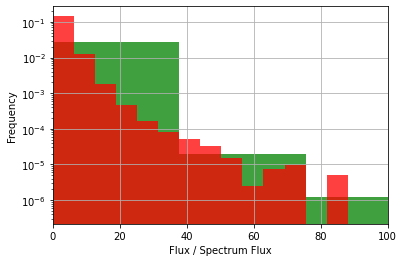

In [25]:
flux_proportionLSP90 = []

for item in lc_downloaded_LSP_weekly:
    
    file_name = item  # .json file name

    df = synchr_type_dataframe(file_name)
    # ---- Output: dataframe

    json_data = extract_data_from_file('weekly', file_name)
    # ---- Input: bins: 'weekly'/ '3-days', file name
    # ---- Output: name, time, flux, time_error, flux_low_error, flux_high_error, time_upper_lim, flux_upper_lim

    table_params = extract_parameters_from_table(json_data[0], df, json_data[2])
    # ---- Input: name, dataframe, flux
    # ---- Output: E, dflux, spec_type, integral_flux
    
    select_this_source = filter_percentage(json_data[0], json_data[2], table_params[3], 90) #### CHANGE THE PERCENTAGE HERE ####
    # ---- Input: name, flux, integral_flux, PERCENTAGE
    # ---- Output: True / False
    
    if (select_this_source == True):    
        flux_proportionLSP90.extend(json_data[2] / table_params[3])  # flux / integral_flux
        print(f' >>> Source {item[5:-5]} selected!')

    
# print(flux_proportionLSP90)



plot_histogram(flux_proportionLSP90, 100, 600, 0, 100)
# ---- Input: flux_proportion, bins1, bins2, x_low_lim, x_high_lim

### LSP + ISP + HSP

#### 10%

In [26]:
len(flux_proportionHSP10)

1227

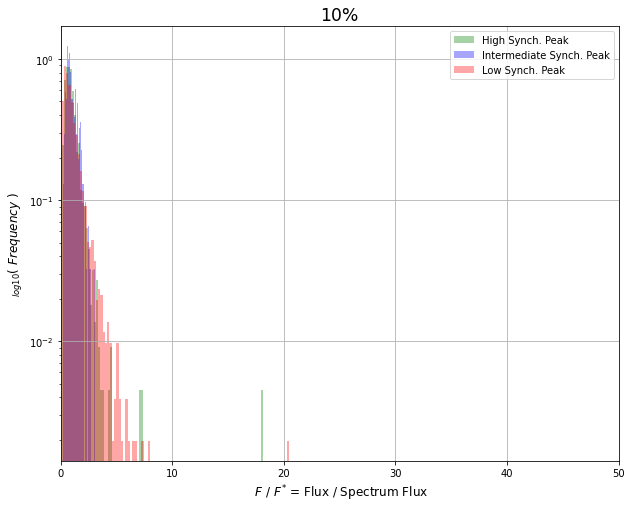

In [27]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(flux_proportionHSP10, 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(flux_proportionISP10, 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(flux_proportionLSP10, 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('10%', fontsize='xx-large')
plt.xlabel(r' $F$ / $F^{*}$ = Flux / Spectrum Flux', fontsize=12)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=12)

plt.xlim(0, 50)
plt.yscale('log')

plt.legend()

plt.grid(True)
plt.show()

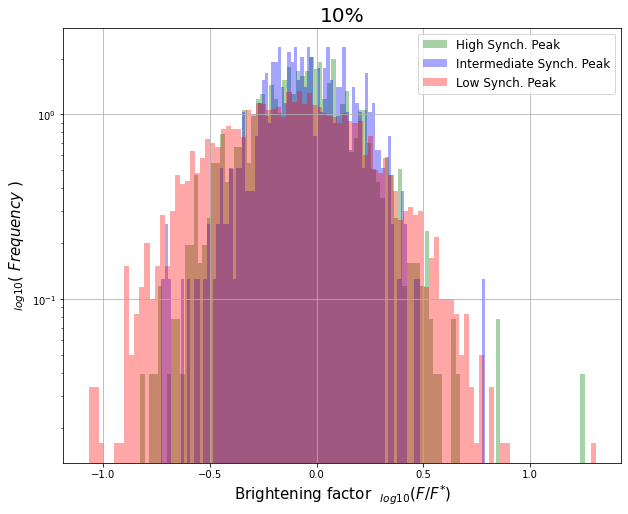

In [28]:
plt.figure(figsize=(10,8))

n1, bins1, patches1 = plt.hist(np.log10(flux_proportionHSP10), 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n2, bins2, patches2 = plt.hist(np.log10(flux_proportionISP10), 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n3, bins3, patches3 = plt.hist(np.log10(flux_proportionLSP10), 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('10%', fontsize=20)
plt.xlabel(r'Brightening factor  $_{log10}\left ( F / F^{*} \right )$', fontsize=15)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=15)

plt.yscale('log')

plt.legend(prop={'size': 12})

plt.grid(True)
plt.show()

#### 50%

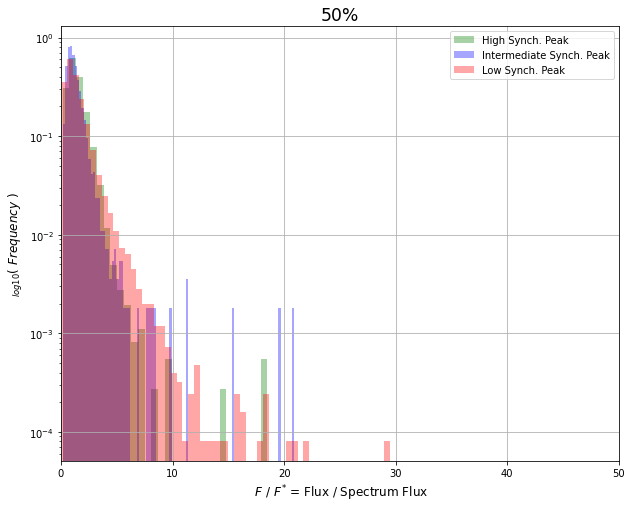

In [29]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(flux_proportionHSP50, 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(flux_proportionISP50, 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(flux_proportionLSP50, 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('50%', fontsize='xx-large')
plt.xlabel(r' $F$ / $F^{*}$ = Flux / Spectrum Flux', fontsize=12)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=12)

plt.xlim(0, 50)
plt.yscale('log')

plt.legend()

plt.grid(True)
plt.show()

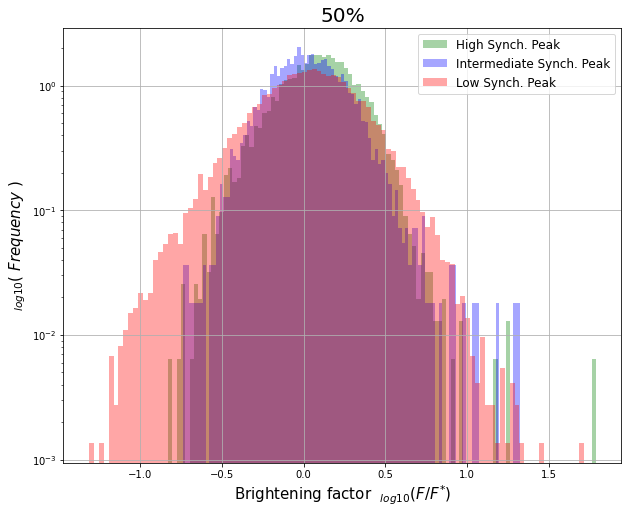

In [30]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(np.log10(flux_proportionHSP50), 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionISP50), 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionLSP50), 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('50%', fontsize=20)
plt.xlabel(r'Brightening factor  $_{log10}\left ( F / F^{*} \right )$', fontsize=15)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=15)

plt.yscale('log')

plt.legend(prop={'size': 12})

plt.grid(True)
plt.show()

#### 90%

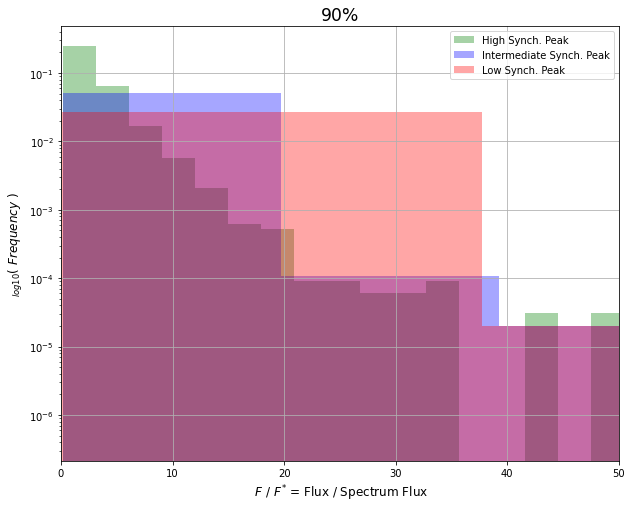

In [31]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(flux_proportionHSP90, 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(flux_proportionISP90, 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(flux_proportionLSP90, 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('90%', fontsize='xx-large')
plt.xlabel(r' $F$ / $F^{*}$ = Flux / Spectrum Flux', fontsize=12)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=12)

plt.xlim(0, 50)
plt.yscale('log')

plt.legend()

plt.grid(True)
plt.show()

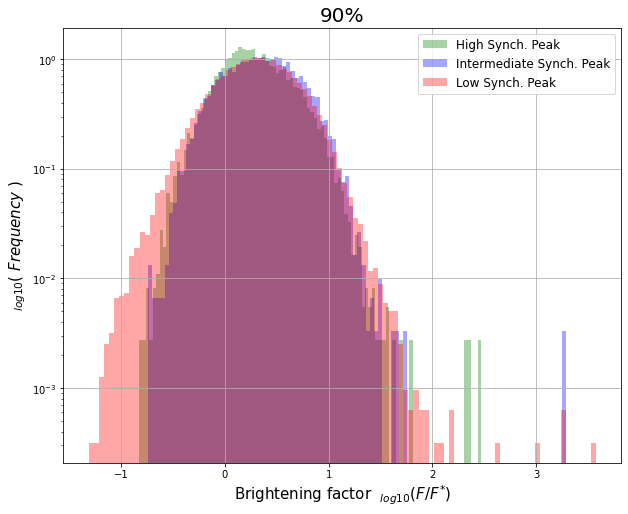

In [32]:
plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(np.log10(flux_proportionHSP90), 100, density=True, facecolor='g', alpha=0.35, label='High Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionISP90), 100, density=True, facecolor='blue', alpha=0.35, label='Intermediate Synch. Peak')
n, bins, patches = plt.hist(np.log10(flux_proportionLSP90), 100, density=True, facecolor='red', alpha=0.35, label='Low Synch. Peak')

plt.title('90%', fontsize=20)
plt.xlabel(r'Brightening factor  $_{log10}\left ( F / F^{*} \right )$', fontsize=15)
plt.ylabel(r'$_{log10}\left ( \ Frequency \ \right )$', fontsize=15)

plt.yscale('log')

plt.legend(prop={'size': 12})

plt.grid(True)
plt.show()